In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, r2_score
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


#**Data Preprocessing**

In [ ]:
df = pd.read_csv('racingresults.csv')

In [ ]:
df.head()

,Year,Position,Number,Draw,Name,Days-since-last-run,Previous-performances,Course-winner,Distance-winner,Odds(decimal),...,Placed-Last-Time-Out,Won-Last-Time-Out,Age,Weight(pounds),Rating,Trainer,Jockey,Distances(lenghts),Going,Profitable
0,2022,1,14,6,Alpinista,45.0,D,No,Yes,4.5,...,Yes,Yes,5,128,120.0,Sir Mark Prescott,L Morris,0.00,Very Soft,1
1,2022,2,15,2,Vadeni (FR),22.0,BF,No,No,10.0,...,Yes,No,3,124,123.0,J C Rouget,C Soumillon,0.50,Very Soft,1
2,2022,3,2,8,Torquator Tasso (GER),28.0,D,No,Yes,8.0,...,Yes,No,5,131,123.0,M Weiss/Schweiz,L Dettori,0.25,Very Soft,1
3,2022,4,16,4,Al Hakeem,48.0,NaN,No,No,21.0,...,Yes,Yes,3,124,114.0,J C Rouget,C Demuro,2.00,Very Soft,1
4,2022,5,13,9,Grand Glory,21.0,C,Yes,No,67.0,...,No,No,6,128,116.0,G Bietolini,M Guyon,1.50,Very Soft,1


In [ ]:
df.shape

(395, 23)

In [ ]:
print(df.isna().sum())

Year                              0
Position                          0
Number                            0
Draw                              0
Name                              0
Days-since-last-run               2
Previous-performances            91
Course-winner                     0
Distance-winner                   0
Odds(decimal)                     0
Form                              0
Num-of-wins-in-last-3-starts      0
Result-last-start                 0
Placed-Last-Time-Out              0
Won-Last-Time-Out                 0
Age                               0
Weight(pounds)                    0
Rating                          191
Trainer                           0
Jockey                            0
Distances(lenghts)              260
Going                             0
Profitable                        0
dtype: int64


In [ ]:
df['Distances(lenghts)'].fillna((df['Distances(lenghts)'].mean()), inplace=True)
df['Rating'].fillna((df['Rating'].mean()), inplace=True)
df['Days-since-last-run'].fillna((df['Days-since-last-run'].mean()), inplace=True)
df['Previous-performances'] = df['Previous-performances'].fillna('N/A')
print(df['Rating'].mean())

114.17156862745101


In [ ]:
print(df.isna().sum())

Year                            0
Position                        0
Number                          0
Draw                            0
Name                            0
Days-since-last-run             0
Previous-performances           0
Course-winner                   0
Distance-winner                 0
Odds(decimal)                   0
Form                            0
Num-of-wins-in-last-3-starts    0
Result-last-start               0
Placed-Last-Time-Out            0
Won-Last-Time-Out               0
Age                             0
Weight(pounds)                  0
Rating                          0
Trainer                         0
Jockey                          0
Distances(lenghts)              0
Going                           0
Profitable                      0
dtype: int64


In [ ]:
df.head()

,Year,Position,Number,Draw,Name,Days-since-last-run,Previous-performances,Course-winner,Distance-winner,Odds(decimal),...,Placed-Last-Time-Out,Won-Last-Time-Out,Age,Weight(pounds),Rating,Trainer,Jockey,Distances(lenghts),Going,Profitable
0,2022,1,14,6,Alpinista,45.0,D,No,Yes,4.5,...,Yes,Yes,5,128,120.0,Sir Mark Prescott,L Morris,0.00,Very Soft,1
1,2022,2,15,2,Vadeni (FR),22.0,BF,No,No,10.0,...,Yes,No,3,124,123.0,J C Rouget,C Soumillon,0.50,Very Soft,1
2,2022,3,2,8,Torquator Tasso (GER),28.0,D,No,Yes,8.0,...,Yes,No,5,131,123.0,M Weiss/Schweiz,L Dettori,0.25,Very Soft,1
3,2022,4,16,4,Al Hakeem,48.0,N/A,No,No,21.0,...,Yes,Yes,3,124,114.0,J C Rouget,C Demuro,2.00,Very Soft,1
4,2022,5,13,9,Grand Glory,21.0,C,Yes,No,67.0,...,No,No,6,128,116.0,G Bietolini,M Guyon,1.50,Very Soft,1


In [ ]:
course_dict = {"Yes": 1, "No": 0} #dict 
df['Course-winner'] = df['Course-winner'].map(course_dict)

dist_dict = {"Yes": 1, "No": 0} #dict 
df['Distance-winner'] = df['Distance-winner'].map(dist_dict)

placed_dict = {"Yes": 1, "No": 0} #dict 
df['Placed-Last-Time-Out'] = df['Placed-Last-Time-Out'].map(placed_dict)

won_dict = {"Yes": 1, "No": 0} #dict 
df['Won-Last-Time-Out'] = df['Won-Last-Time-Out'].map(won_dict)

going_dict = {"Heavy": 0, "Very Soft": 1, "Soft": 2, "Good to Soft": 3, "Good": 4}
df['Going'] = df['Going'].map(going_dict)

In [ ]:
df.head()

,Year,Position,Number,Draw,Name,Days-since-last-run,Previous-performances,Course-winner,Distance-winner,Odds(decimal),...,Placed-Last-Time-Out,Won-Last-Time-Out,Age,Weight(pounds),Rating,Trainer,Jockey,Distances(lenghts),Going,Profitable
0,2022,1,14,6,Alpinista,45.0,D,0,1,4.5,...,1,1,5,128,120.0,Sir Mark Prescott,L Morris,0.00,1,1
1,2022,2,15,2,Vadeni (FR),22.0,BF,0,0,10.0,...,1,0,3,124,123.0,J C Rouget,C Soumillon,0.50,1,1
2,2022,3,2,8,Torquator Tasso (GER),28.0,D,0,1,8.0,...,1,0,5,131,123.0,M Weiss/Schweiz,L Dettori,0.25,1,1
3,2022,4,16,4,Al Hakeem,48.0,N/A,0,0,21.0,...,1,1,3,124,114.0,J C Rouget,C Demuro,2.00,1,1
4,2022,5,13,9,Grand Glory,21.0,C,1,0,67.0,...,0,0,6,128,116.0,G Bietolini,M Guyon,1.50,1,1


In [ ]:
df.Trainer = df.Trainer.astype('category').cat.codes
df.Jockey = df.Jockey.astype('category').cat.codes
df = df.drop('Previous-performances', axis = 1)
df = df.drop('Form', axis = 1)
df = df.drop('Name', axis = 1)


In [ ]:
pd.get_dummies(df, drop_first=False).corr()['Profitable'].sort_values(ascending=False)

Profitable                      1.000000
Rating                          0.249241
Num-of-wins-in-last-3-starts    0.222178
Placed-Last-Time-Out            0.178875
Won-Last-Time-Out               0.124723
Days-since-last-run             0.024415
Course-winner                   0.023038
Weight(pounds)                  0.012843
Distance-winner                 0.004836
Number                         -0.002142
Going                          -0.003375
Year                           -0.005115
Jockey                         -0.005820
Age                            -0.074038
Trainer                        -0.111833
Distances(lenghts)             -0.116627
Draw                           -0.140299
Result-last-start              -0.182083
Odds(decimal)                  -0.279822
Position                       -0.712435
Name: Profitable, dtype: float64

In [ ]:
df = df.drop('Position', axis = 1)

In [ ]:
df

,Year,Number,Draw,Days-since-last-run,Course-winner,Distance-winner,Odds(decimal),Num-of-wins-in-last-3-starts,Result-last-start,Placed-Last-Time-Out,Won-Last-Time-Out,Age,Weight(pounds),Rating,Trainer,Jockey,Distances(lenghts),Going,Profitable
0,2022,14,6,45.0,0,1,4.5,3,1,1,1,5,128,120.0,100,48,0.000000,1,1
1,2022,15,2,22.0,0,0,10.0,2,3,1,0,3,124,123.0,48,13,0.500000,1,1
2,2022,2,8,28.0,0,1,8.0,1,2,1,0,5,131,123.0,69,47,0.250000,1,1
3,2022,16,4,48.0,0,0,21.0,2,1,1,1,3,124,114.0,48,10,2.000000,1,1
4,2022,13,9,21.0,1,0,67.0,1,7,0,0,6,128,116.0,37,52,1.500000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2020,3,7,451.0,0,1,101.0,0,7,0,0,5,128,74.0,71,53,2.726667,1,0
391,2020,6,3,20.0,0,1,13.0,0,4,0,0,4,128,111.0,75,47,2.726667,1,0
392,2020,8,8,13.0,0,1,101.0,0,5,0,0,4,124,102.0,14,10,2.726667,1,0
393,2020,2,4,27.0,0,1,7.0,0,3,1,0,4,128,105.0,2,49,2.726667,1,0


# **Building Models**

In [ ]:
#identify the x & y variables
X = df.drop('Profitable', axis=1)
y = df['Profitable']

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Profitable', axis=1)), columns=df.columns[:-1])

In [ ]:
normalizer = Normalizer()
X_normalized = pd.DataFrame(normalizer.fit_transform(df.drop('Profitable', axis=1)), columns=df.columns[:-1])



## > **Functions for fitting and comparing**



In [ ]:
#function used to fit model that will be called in the compare model function
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    return train_score, test_score, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

def model_comparison(X, y):
    #using 80/20 split 
    #this function will return train score, test score, precision score, recall score and f1 score
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #knn
    knn_train_score, knn_test_score, knn_pre, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
    #random forest
    rf_train_score, rf_test_score, rf_pre, rf_re, rf_f1 = fit_predict_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)
    #XGBoost, verbosity: silent
    xgb_train_score, xgb_test_score, xgb_pre, xgb_re, xgb_f1 = fit_predict_score(XGBClassifier(verbosity=0), X_train, y_train, X_test, y_test)
    #Decision Tree
    dtree_train_score, dtree_test_score, dtree_pre, dtree_re, dtree_f1 = fit_predict_score(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
    #Gradient Boosting 
    gbc_train_score, gbc_test_score, gbc_pre, gbc_re, gbc_f1 = fit_predict_score(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)
    #ADA Boosting
    ada_train_score, ada_test_score, ada_pre, ada_re, ada_f1 = fit_predict_score(AdaBoostClassifier(), X_train, y_train, X_test, y_test)
    #Extra Trees
    xtc_train_score, xtc_test_score, xtc_pre, xtc_re, xtc_f1 = fit_predict_score(ExtraTreesClassifier(), X_train, y_train, X_test, y_test)

    models = ['KNN', 'Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting', 'ADA Boosting', 'Extra Trees']

    train_score = [knn_train_score, rf_train_score, xgb_train_score, dtree_train_score, gbc_train_score, ada_train_score, xtc_train_score]
    test_score = [knn_test_score, rf_test_score, xgb_test_score, dtree_test_score, gbc_test_score, ada_test_score, xtc_test_score]
    precision = [knn_pre, rf_pre, xgb_pre, dtree_pre, gbc_pre, ada_pre, xtc_pre]
    recall = [knn_re, rf_re, xgb_re, dtree_re, gbc_re, ada_re, xtc_re]
    f1 = [knn_f1, rf_f1, xgb_f1, dtree_f1, gbc_f1, ada_f1, xtc_f1]

    model_comparison = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                             1:'Training Score',
                                                                                                             2: 'Test Score (Accuracy)',
                                                                                                             3: 'Precision',
                                                                                                             4: 'Recall',
                                                                                                             5: 'F1 Score'
                                                                                                            }, axis=1)
    
    return model_comparison

In [ ]:
display(model_comparison(X, y))

,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,KNN,0.762658,0.64557,0.315789,0.285714,0.3
1,Random Forest,1.0,0.734177,0.5,0.380952,0.432432
2,XGBoost,1.0,0.746835,0.526316,0.47619,0.5
3,Decision Tree,1.0,0.670886,0.407407,0.52381,0.458333
4,Gradient Boosting,0.981013,0.78481,0.611111,0.52381,0.564103
5,ADA Boosting,0.863924,0.708861,0.4375,0.333333,0.378378
6,Extra Trees,1.0,0.734177,0.5,0.238095,0.322581


In [ ]:
print("Standardized DataFrame")
display(model_comparison(X_scaled, y))

Standardized DataFrame


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,KNN,0.816456,0.708861,0.4375,0.333333,0.378378
1,Random Forest,1.0,0.759494,0.571429,0.380952,0.457143
2,XGBoost,1.0,0.746835,0.526316,0.47619,0.5
3,Decision Tree,1.0,0.683544,0.428571,0.571429,0.489796
4,Gradient Boosting,0.981013,0.78481,0.611111,0.52381,0.564103
5,ADA Boosting,0.863924,0.708861,0.4375,0.333333,0.378378
6,Extra Trees,1.0,0.772152,0.636364,0.333333,0.4375


In [ ]:
print("\nNormalized DataFrame:")
display(model_comparison(X_normalized, y))


Normalized DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,KNN,0.781646,0.620253,0.285714,0.285714,0.285714
1,Random Forest,1.0,0.734177,0.5,0.380952,0.432432
2,XGBoost,1.0,0.746835,0.52381,0.52381,0.52381
3,Decision Tree,1.0,0.620253,0.363636,0.571429,0.444444
4,Gradient Boosting,1.0,0.734177,0.5,0.52381,0.511628
5,ADA Boosting,0.936709,0.746835,0.52381,0.52381,0.52381
6,Extra Trees,1.0,0.746835,0.538462,0.333333,0.411765


# **Tuning Parameters**

In [ ]:
#knn tuning
params = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "weights": ['uniform', 'distance'],
    "metric": ['minkowski', 'euclidian'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = params, cv = 5, verbose = 0)
knn_grid.fit(X_normalized, y)

print("KNN Best Parameters : ", knn_grid.best_params_)

KNN Best Parameters :  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklear

In [ ]:
#random forest tuning
params = {
    'n_estimators': [10, 25, 50, 100, 200, 300, 400, 500],
    'max_depth' : [2, 4, 6, 8, 10, 15, 20, 25],
    'criterion' :['gini', 'entropy']}

rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params, cv = 5, verbose = 0)
rf_grid.fit(X_normalized, y)

print("Randon Forest Best Parameters : ", rf_grid.best_params_)

Randon Forest Best Parameters :  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 25}


In [ ]:
#xgboost tuning
X_sample = X_normalized.sample(n=250, random_state=42)
y_sample = y[X_sample.index]

params = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [1, 3, 5],
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.1, 0.3, 0.5, 0.8, 1],
    'colsample_bytree': [0.1, 0.3, 0.5],
    'n_estimators' : [10, 25, 50, 100, 200],
    'objective': ['reg:squarederror']}
 
xgb_grid = GridSearchCV(estimator = XGBClassifier(),param_grid = params, cv = 5, verbose = 0)
xgb_grid.fit(X_sample, y_sample)

print(" XGBoost Best Parameters : ", xgb_grid.best_params_)

 XGBoost Best Parameters :  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.5}


In [ ]:
#decision tree tuning
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]}

dtree_grid = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = params, cv = 5,verbose = 0)

dtree_grid.fit(X_normalized, y)

print("Decision Tree Best Parameters : ", dtree_grid.best_params_)

Decision Tree Best Parameters :  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate

In [ ]:
#ADA Boosting tuning
params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

ada_grid = GridSearchCV(estimator = AdaBoostClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose = 0)

ada_grid.fit(X_normalized, y)

print("Best Parameters : ", ada_grid.best_params_)

Best Parameters :  {'learning_rate': 0.3, 'n_estimators': 100}


In [ ]:
#Gradient Boosting tuning
params = {
    'learning_rate': [0.1, 0.3, 0.5, 0.8, 1],
    'max_depth': [1, 3, 5, 7, 10, 15, 25],
    'subsample': [0.1, 0.3, 0.5, 0.8, 1],
    'n_estimators' : [5, 10, 15, 25, 50, 100]
}

gbc_grid = GridSearchCV(estimator = GradientBoostingClassifier(),
                        param_grid = params,
                        cv = 3,
                        verbose = 0)

gbc_grid.fit(X_normalized, y)

print("Best Parameters : ", gbc_grid.best_params_)

Best Parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.3}


In [ ]:
#Extra Trees tuning
params = {
    'n_estimators' : [50, 75, 100, 125, 150],
    'max_depth': [i for i in range(1, 10, 2)],
    'min_samples_leaf': [i for i in range(1, 10, 2)],
    'min_samples_split': [i for i in range(1, 10, 2)]
}

xtc_grid = GridSearchCV(estimator = ExtraTreesClassifier(),
                        param_grid = params,
                        cv = 3,
                        verbose = 0)

xtc_grid.fit(X_normalized, y)

print("Best Parameters : ", xtc_grid.best_params_)

Best Parameters :  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
375 fits failed out of a total of 1875.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/

In [ ]:
print("KNN Best Parameters : ", knn_grid.best_params_)
print("Randon Forest Best Parameters : ", rf_grid.best_params_)
print("XGBoost Best Parameters : ", xgb_grid.best_params_)
print("Decision Tree Best Parameters : ", dtree_grid.best_params_)
print("ADA Boosting Best Parameters : ", ada_grid.best_params_)
print("Gradient Boosting Best Parameters : ", gbc_grid.best_params_)
print("Extra Trees Best Parameters : ", xtc_grid.best_params_)

## **Tuned Models**

In [ ]:
#created another comparison matrix based out best parameters found
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

knn_train_score, knn_test_score, knn_pre, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(metric='minkowski', n_neighbors= 7, weights='distance', algorithm='auto'), X_train, y_train, X_test, y_test)
rf_train_score, rf_test_score, rf_pre, rf_re, rf_f1 = fit_predict_score(RandomForestClassifier(criterion='gini', max_depth= 10, n_estimators= 300), X_train, y_train, X_test, y_test)
xgb_train_score, xgb_test_score, xgb_pre, xgb_re, xgb_f1 = fit_predict_score(XGBClassifier(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 3, min_child_weight=3 ,n_estimators=200, objective='reg:squarederror', subsample=1), X_train, y_train, X_test, y_test)
dtree_train_score, dtree_test_score, dtree_pre, dtree_re, dtree_f1 = fit_predict_score(DecisionTreeClassifier(criterion='entropy', max_depth= 2, min_samples_leaf= 1, min_samples_split= 2), X_train, y_train, X_test, y_test)
ada_train_score, ada_test_score, ada_pre, ada_re, ada_f1 = fit_predict_score(AdaBoostClassifier(learning_rate=0.3, n_estimators=100), X_train, y_train, X_test, y_test)
gbc_train_score, gbc_test_score, gbc_pre, gbc_re, gbc_f1 = fit_predict_score(GradientBoostingClassifier(learning_rate=0.1, max_depth=1, n_estimators=15, subsample=0.3), X_train, y_train, X_test, y_test)
xtc_train_score, xtc_test_score, xtc_pre, xtc_re, xtc_f1 = fit_predict_score(ExtraTreesClassifier(max_depth=9, min_samples_leaf=7, min_samples_split=7, n_estimators=50), X_train, y_train, X_test, y_test)


In [ ]:
models = ['KNN', 'Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting', 'ADA Boosting', 'Extra Trees']

train_score = [knn_train_score, rf_train_score, xgb_train_score, dtree_train_score, gbc_train_score, ada_train_score, xtc_train_score]
test_score = [knn_test_score, rf_test_score, xgb_test_score, dtree_test_score, gbc_test_score, ada_test_score, xtc_test_score]
precision = [knn_pre, rf_pre, xgb_pre, dtree_pre, gbc_pre, ada_pre, xtc_pre]
recall = [knn_re, rf_re, xgb_re, dtree_re, gbc_re, ada_re, xtc_re]
f1 = [knn_f1, rf_f1, xgb_f1, dtree_f1, gbc_f1, ada_f1, xtc_f1]

tuned_models = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                     1:'Training Score',
                                                                                                     2: 'Test Score (Accuracy)',
                                                                                                     3: 'Precision',
                                                                                                     4: 'Recall',
                                                                                                     5: 'F1 Score'
                                                                                                        }, axis=1)

In [ ]:
print("Tuned Parameters:")
display(tuned_models)

Tuned Parameters:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,KNN,1.0,0.696203,0.411765,0.333333,0.368421
1,Random Forest,1.0,0.78481,0.625,0.47619,0.540541
2,XGBoost,1.0,0.734177,0.5,0.428571,0.461538
3,Decision Tree,0.740506,0.696203,0.411765,0.333333,0.368421
4,Gradient Boosting,0.740506,0.759494,0.6,0.285714,0.387097
5,ADA Boosting,0.898734,0.78481,0.625,0.47619,0.540541
6,Extra Trees,0.806962,0.734177,0.5,0.142857,0.222222


<ipython-input-88-17e2e4330830>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lables, rotation=45)


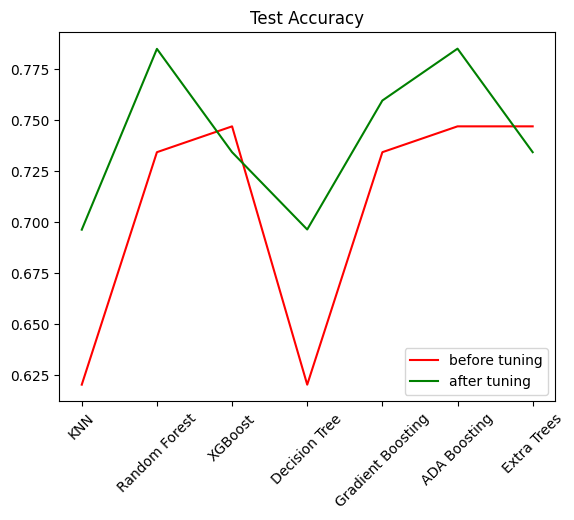

In [88]:
fig, ax = plt.subplots(1,1)

plt.plot([0.620253,0.734177,0.746835,0.620253,0.734177,0.746835,0.746835], color='red', label='before tuning')
plt.plot([0.696203,0.78481,0.734177,0.696293,0.759494,0.78491,0.734177], color='green', label='after tuning')
lables = [0, 'KNN', 'Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting', 'ADA Boosting', 'Extra Trees']

plt.legend()
plt.title('Test Accuracy')
ax.set_xticklabels(lables, rotation=45)
plt.show()

<ipython-input-2-28f5fb5be5b8>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lables, rotation=45)


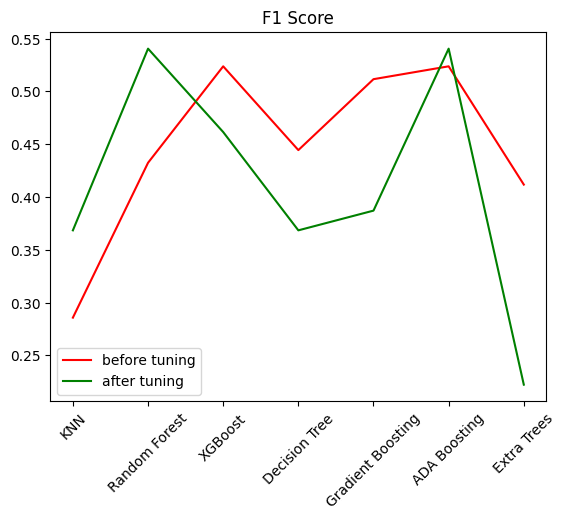

In [2]:
fig, ax = plt.subplots(1,1)

plt.plot([0.285714,0.432432,0.52381,0.444444,0.511628,0.52381,0.411765], color='red', label='before tuning')
plt.plot([0.368421,0.540541,0.461538,0.368421,0.387097,0.540541,0.222222], color='green', label='after tuning')
lables = [0, 'KNN', 'Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting', 'ADA Boosting', 'Extra Trees']

plt.legend()
plt.title('F1 Score')
ax.set_xticklabels(lables, rotation=45)
plt.show()

# **Stacking**

In [ ]:
%pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=826b06d8de7999d7ebee5d923b5dd24473266a48b7f5f92ddbef36401e8f5747
  Stored in directory: /root/.cache/pip/wheels/7e/ee/d6/47cb94a403bc544de1433986e5530d6b0498021098fbe43aa1
Successfully built vecstack


In [ ]:
from vecstack import stacking

In [ ]:
models = [
    RandomForestClassifier(criterion='gini', max_depth= 25, n_estimators= 500),
        
    XGBClassifier(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 3, min_child_weight=3 ,n_estimators=200, objective='reg:squarederror', subsample=1),

    AdaBoostClassifier(learning_rate=0.3, n_estimators=100),
]

In [ ]:
S_train, S_test = stacking(models,                   
                           X_train, y_train.values.ravel(), X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=3, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.77358491]
    fold  1:  [0.77142857]
    fold  2:  [0.70476190]
    ----
    MEAN:     [0.74992513] + [0.03194735]
    FULL:     [0.75000000]

model  1:     [XGBClassifier]
    fold  0:  [0.73584906]
    fold  1:  [0.67619048]
    fold  2:  [0.69523810]
    ----
    MEAN:     [0.70242588] + [0.02488018]
    FULL:     [0.70253165]

model  2:     [AdaBoostClassifier]
    fold  0:  [0.69811321]
    fold  1:  [0.69523810]
    fold  2:  [0.68571429]
    ----
    MEAN:     [0.69302186] + [0.00529887]
    FULL:     [0.69303797]



In [ ]:
model =RandomForestClassifier(random_state=0, n_jobs=-1)
    
model = model.fit(S_train, y_train.values.ravel())
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.81012658]


# **XGBoost Model Predictor**

In [ ]:
df3 = pd.read_csv('racingresults2.csv')

In [ ]:
placed_dict = {"Yes": 1, "No": 0} #dict 
df3['Placed-Last-Time-Out'] = df3['Placed-Last-Time-Out'].map(placed_dict)

won_dict = {"Yes": 1, "No": 0} #dict 
df3['Won-Last-Time-Out'] = df3['Won-Last-Time-Out'].map(won_dict)

course_dict = {"Yes": 1, "No": 0} #dict 
df3['Course-winner'] = df3['Course-winner'].map(won_dict)

df3['Rating'].fillna((df3['Rating'].mean()), inplace=True)
df3

,Number,Rating,Num-of-wins-in-last-3-starts,Placed-Last-Time-Out,Won-Last-Time-Out,Odds(decimal),Result-last-start,Draw,Age,Course-winner,Profitable
0,14,120.0,3,1,1,4.5,1,6,5,0,1
1,15,123.0,2,1,0,10.0,3,2,3,0,1
2,2,123.0,1,1,0,8.0,2,8,5,0,1
3,16,114.0,2,1,1,21.0,1,4,3,0,1
4,13,116.0,1,0,0,67.0,7,9,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...
390,3,74.0,0,0,0,101.0,7,7,5,0,0
391,6,111.0,0,0,0,13.0,4,3,4,0,0
392,8,102.0,0,0,0,101.0,5,8,4,0,0
393,2,105.0,0,1,0,7.0,3,4,4,0,0


In [ ]:
X = df3[['Number','Num-of-wins-in-last-3-starts','Placed-Last-Time-Out','Result-last-start','Draw']]
y = df3['Profitable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBClassifier(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 3, min_child_weight=3 ,n_estimators=200, objective='reg:squarederror', subsample=1)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, min_child_weight=3, n_estimators=200,
              objective='reg:squarederror')

### **Prediction of Previous Years**

In [ ]:
twentytwo_data = pd.DataFrame({
    'Number': [14,15,2,16,13,18,20,7,5,17,11,10,1,8,3,4,12,6,19,9],
    'Num-of-wins-in-last-3-starts': [3,2,1,2,1,1,2,0,1,1,3,1,0,1,1,0,0,1,1,1],
    'Placed-Last-Time-Out': [1,1,1,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,1],
    'Result-last-start' : [1,3,2,1,7,5,1,7,6,2,1,1,4,2,7,4,2,4,4,1],
    'Draw' : [6,2,8,4,9,7,8,14,12,11,10,1,17,20,19,15,13,5,3,16]
})

In [ ]:
print('2022 Predicted Profitable Bets: ')

print(model.predict(twentytwo_data))

2022 Predicted Profitable Bets: 
[1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
twentyone_data = pd.DataFrame({
    'Number': [1,4,11,10,12,15,7,14,13,8,3,6,9,2],
    'Num-of-wins-in-last-3-starts': [2,2,3,2,0,2,2,1,1,1,1,1,0,2],
    'Placed-Last-Time-Out': [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'Result-last-start' : [1,2,1,1,2,2,1,1,2,2,2,1,2,1],
    'Draw' : [12,3,2,11,10,9,14,6,8,1,7,15,13,5]
})

In [ ]:
print('2021 Predicted Profitable Bets: ')

print(model.predict(twentyone_data))

2021 Predicted Profitable Bets: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 1]
